 # Introduction/Competition Description 
 
 The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
 
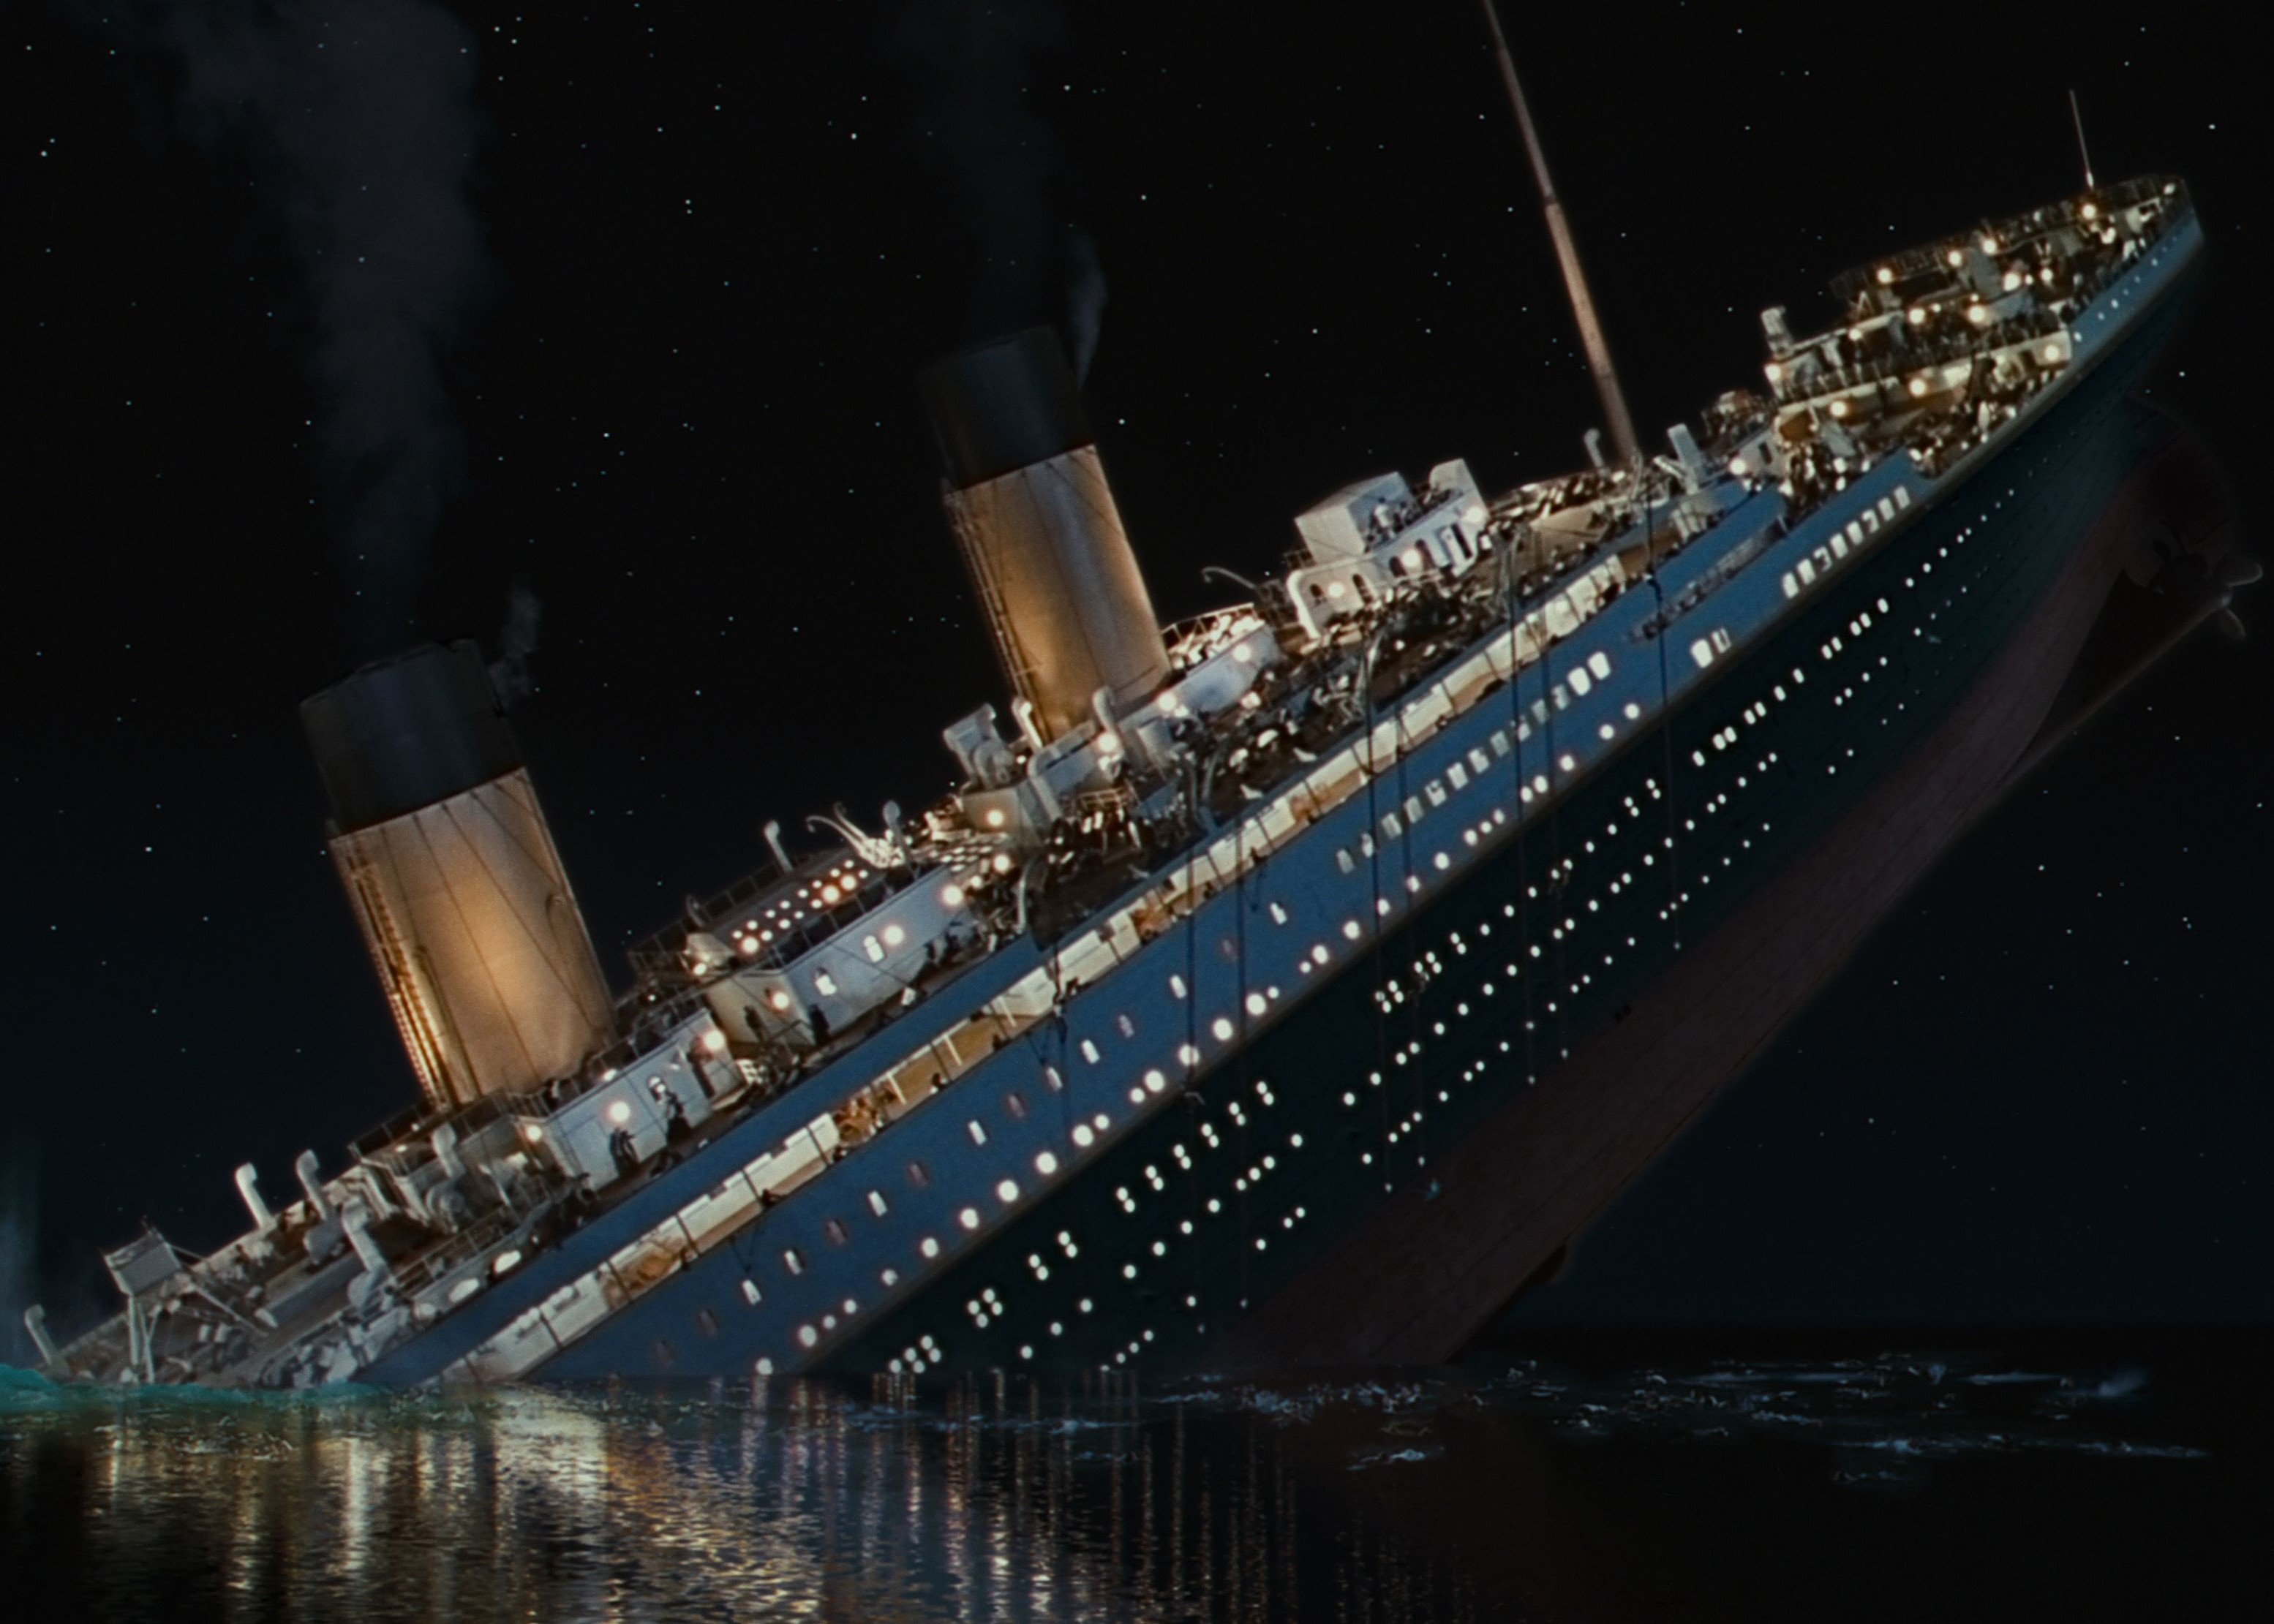

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# Goal 

Our goal is to predict what sort of passengers were more likely to survive the sinking of the Titanic. Before we go any further, i want us to think about the most important reasons for some passengers to likely survive the titanic sinking than others.

# Workflow Stages

Let's consider the workflow stages listed below to provide the solution for this challenge. 

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

## 1. Question and problem definition.

It is very important to define the problem to solve or question to ask. We can review the question or problem definition from our *Introduction/Competition Description Cell* above.

We may also want to develop some early understanding about the domain of our problem as described in our *Introduction/Competition Description Cell*

**.** On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

**.** One of the reasons that the shipwreck led to such loss of life was that there were no enough lifeboats for the passengers and crew.

**.** Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.




### Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying** We may want to classify or categorize our samples. We may also want to understand the implications of different classes with our solution goal.

**Correlating** We may want to approach the problem based on available features withing the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking, is there a correlation among a feature and solution goal. As the feature values change does the solution state change as well, and vice-versa?. This can be tested for both numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages

**Converting** For modeling stage, we need to prepare the data. Depending on the choice of model algorithm, we may require all features to be converted to numerical equivalent values. For instance converting text categorical values to numeric values.

**Completing** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to correct these values or exclude the samples containing the errors.

**Creating** Can we create new features based on an existing feature or a set of features such that the new feature follows the correlation, conversion and completion goals.

**Charting** How can we select the right visualization plots and charts depending on the nature of the data and the solution goals.



In [1]:
# Import libraries for...

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression

## 2. Aquire data

We use the Python Pandas packages to help us work with our datasets. We start by acquiring the training and testing dataset into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets

In [2]:
# Acquire training and testing datasets

train_df = pd.read_csv('titanic/train.csv')

test_df = pd.read_csv('titanic/test.csv')

combine = [train_df, test_df]


## 3. Analyze by describing data

Pandas also helps describe the datasets answering the following questions early  in our analysis.

**Which features are available in the dataset?**

Noting the feature names helps for directly manipulating or analyzing these features.

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Which features are categorical**

Categorical features classify the samples into sets of similar samples. Within categorical features, we seek to understand whether the values are nominal, ordinal, ratio or interval-based?. Among other things this help us select the appropriate plots for visualization.

**.** **Categorical**: Survived, Sex, and Embarked. 
**.** **Ordinal**: Pclass

**Which features are numerical**

Which features in our sample are numerical. Within numerical features, we seek to understand whether the values are discrete, continuous, or timeseries based?.
Among other things this help us select the appropriate plots for visualization.

**.** **Continuous**: Age, Fare.
**.** **Discrete**: SibSp, Parch


In [4]:
# preview first 5 rows from data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Which features are mixed data types?**

Numerical, alphanumeric data within same feature. These are features for correcting goals.

**.** Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

**Which features may contain errors or typos**

This can be hard to review for such a large dataset, however reviewing a few samples from the dataset might just tell which features requires correcting.

**.** Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used as alternatives or short names.

In [5]:
# preview last 5 rows from training data
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Which features contain blank, null or empty values?**

These features will require completing.

**.** Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
**.** Cabin > Age are incomplete in that order for the testing dataset.

**What are the data types for various features?**

This will help us during converting goals.

**.** Seven features are integer or floats in the training dataset. Six in the case of test dataset.
**.** Five similar features are strings(object) for both datasets.

In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

**.** Total samples are 891 or 40% of the actual number of passengers on board the Titanic(2224).
**.** Survived is a categorical feature with 0 or 1 values.

**.** Around 38% samples survived representative of the actual survival rate at 32%.

**.** Most passengers (> 75%) did not travel with parents or children.

**.** Fares varied significantly with few passengers paying as high as $512.

**.** Few elderly passengers within age range 65-80.

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What is the distribution of categorical features values across the sample?**

**.** Names are unique across the dataset (count=unique=891).

**.** Sex variable as two possible values with 65% male (top=male, freq=577/count=891).

**.** Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.

**.** Embarked takes three possible values. S port used by most passengers (top=S).

**.** Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Parkes, Mr. Francis ""Frank""",male,347082,B96 B98,S
freq,1,577,7,4,644


### **Assumptions based on data analysis**

We arrive at the following assumptions based on data analysis done so far. We may want to validate these assumptions further before taking appropriate actions.

**Correlating.**

 We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.
 
**Completing.**

1. We may want to complete Age feature as it is definitely correlated to Survival.

2. We may want to complete the Embarked feature as it may also correlate with Survival or another important feature.

**Correcting.**

1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.

2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.

3. PassengerId may be dropped from training dataset as it does not contribute to survival.

4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

**Creating.**

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.

2. We may want to engineer the Name feature to extract Title as a new feature.

3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.

4. We may also want to create a Fare range feature if it helps our analysis.

**Classifying.**

We may also add to our assumptions based on the problem description noted earlier.

1. Women(Sex=female) were more likely to have survived.

2. Children(Age<?) were more likely to have survived.

3. The upper-class passengers(Pclass=1) were more likely to have survived.




### **Confirmation of  Observations/Assumption**

To confirm some of our observations and assumptions, we are going to further analyze our samples. These analyses will be based on **pivoting features** and **visualizations**.


## 3.1 Analyze by pivoting features.

We can quickly analyze our features correlations by pivoting features against each other. These can only be done at this stage for features which do not have empty values. It also makes sense doing so only for features which are categorical(Sex), ordinal(Pclass) or discrete(SibSp, Parch) type.

**.** **Pclass** We observe significant correlation(>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.

**.** **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate (classifying #1).

**.** **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [9]:
# pivot Pclass and Survived feature against each other

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean() \
.sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
# pivot Sex and Survived feature against each other

train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean() \
.sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
# pivot SibSp and Survived feature against each other.

train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean() \
.sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
# pivot Parch and Survived feature against each other.

train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean() \
.sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## 3.2 Analyze by visualizing data.

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

#### Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns.The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?).

**Observations.**

**.** Infants (Age <= 4) had high survival rate.

**.** Oldest passengers (Age = 80) survived.

**.** Large number of 15-25 year olds did not survive.

**.** Most passengers are in 15-35 age range.

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

**.** We should consider Age (our assumption classifying #2) in our model training.

**.** Complete the Age feature for null values (completing #1).

**.** We should band age groups (creating #3).


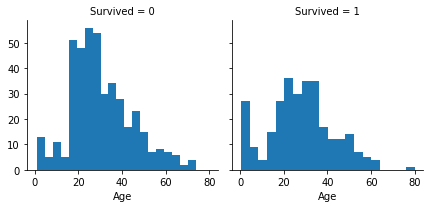

In [13]:
# Initialize a grid of plots with an Axes for each Survived column-wise.
grid = sns.FacetGrid(train_df, col='Survived')

# Draw a histogram to show the variation of Age.
grid.map(plt.hist, 'Age', bins=20)

grid.add_legend();

#### Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

**Observations.**

**.** Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #3.

**.** Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.

**.** Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.

**.** Pclass varies in terms of Age distribution of passengers.

**Decisions.**

**.** Consider Pclass for model training.

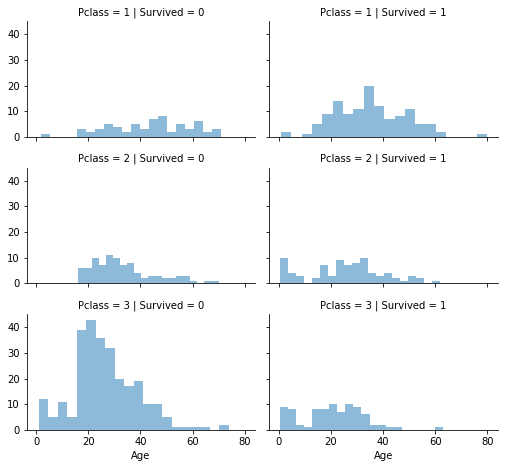

In [14]:
# Initialize a grid of plots with an Axes for each Pclass row-wise, Survived column-wise
g = sns.FacetGrid(train_df, col='Survived', row='Pclass',  height=2.2, aspect=1.6)

# Draw a histogram to show the variation of Age
g.map(plt.hist, 'Age', alpha=.5, bins=20)

g.add_legend();

#### Correlating numerical and ordinal features

Now we can correlate categorical features with our solution goal.

**Observations.**

**.** Female passengers had much better survival rate than males. Confirms classifying (#1)..

**.** Males had better survival rate in Pclass=3 when compared with Pclass=2         for C and Q ports. Completing (#2).

**.** Ports of embarkation have varying survival rates for Pclass=3 and among         male passengers. Correlating (#1).

**Decisions.**

**.** Add Sex feature to model training.
**.** Complete and add Embarked feature to model training.

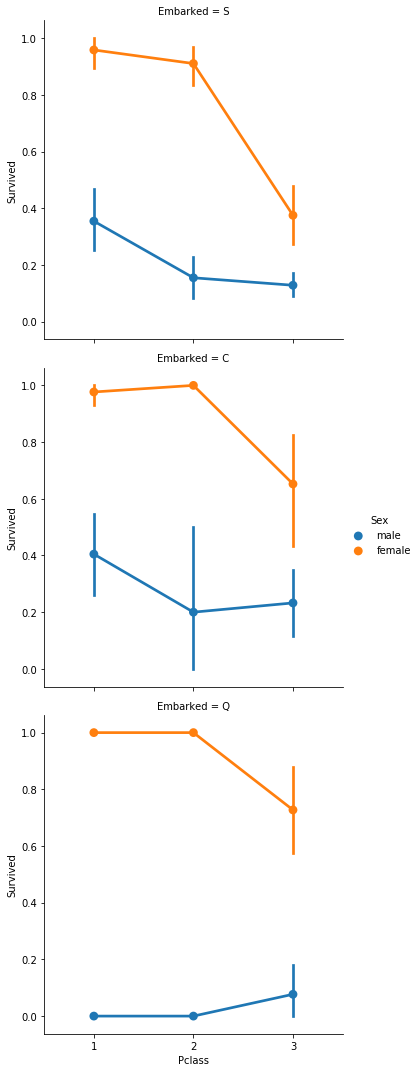

In [15]:
# Draw a point plot to show the tracjectory of 'Embarked' with respect to \
# 'Pclass', 'Survived', and 'Sex'.
sns.catplot(x='Pclass', row='Embarked', y='Survived', hue='Sex', data=train_df, kind='point')


#### Correlating categorical and numerical features

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

**Observations.**

**.** Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.

**.** Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

**Decisions.**

**.** Consider banding Fare feature.

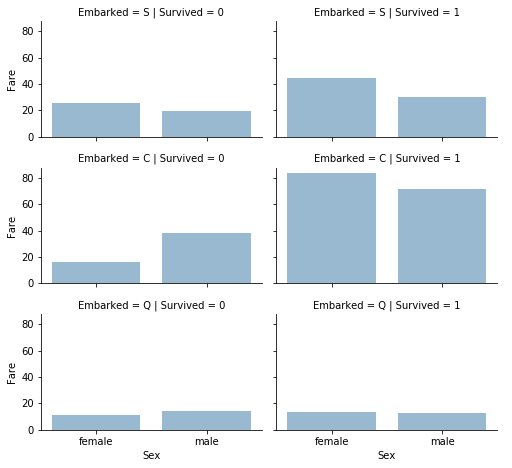

In [16]:
# Initialize a grid of plots with an Axes for each Categorical non-numeric values (Embarked row-wise, Survived column-wise)
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)

# Draw a bar plot to show how 'Sex' varies with 'Fare'
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, order=['female', 'male'], ci=None)

grid.add_legend();

## 4. Wrangle data.

We have collected several assumptions and decisions regarding our datasets and solutions requirements. So far we did not have to change a single feature or value to arrive at these. 
Let us now execute our decisions and assumptions for correcting, creating, converting and completing goals.


#### Correlating categorical and numerical features

This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent

In [17]:
# preview shapes for train_df and test_df before dropping operations
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

# Drop 'Ticket' and 'Cabin' feature from train_df and test_df
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

# preview shapes for train_df and test_df after dropping operations
print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


#### Creating new feature extracting from existing 

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

**Observations.**

When we plot Title, Age, and Survived, we note the following observations.

**.** Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.

**.** Survival among Title Age bands varies slightly.

**.** Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

**Decision.**

We decide to retain the new Title feature for model training.

In [18]:
# Extract titles from 'Name' feature
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
# Replace many titles with a more common name or classify them as 'Rare'

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()    

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
# convert categorical titles to ordinals

title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
# preview first 5 rows
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [21]:
# safely drop the 'Name' feature from training dataset
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)

# drop only the 'Name' feature from testing dataset
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

# preview their shapes
train_df.shape, test_df.shape

((891, 9), (418, 9))

#### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.
 
Let us start by converting Sex feature to contain numerical values where female=1 and male=0.

In [22]:
# convert 'Sex' to 'Gender' feature

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0}).astype(int)
    
# preview first 5 rows of train_df
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

1. A simple way is to generate random numbers between mean and standard deviation.

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Sex, and Pclass. Guess Age values using median values for Age across sets of Pclass and Sex feature combinations. So, median Age for Pclass=1 and Sexr=0, Pclass=1 and Sex=1, and so on...

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

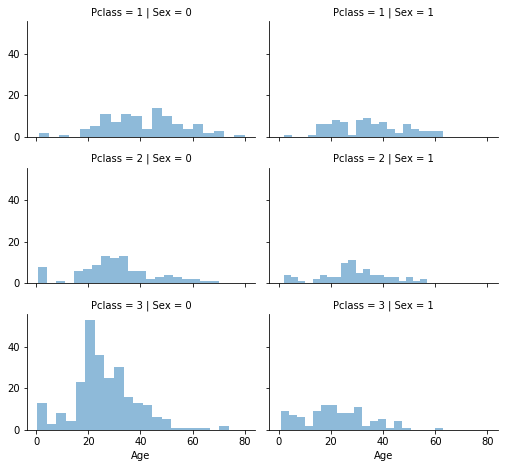

In [23]:
# Initialize a grid of plots with an Axes for each Pclass row-wise, Sex column-wise
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)

# Draw a histogram to show the variation of Age
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

grid.add_legend();


In [24]:
# prepare empty array for guess Age values based on Sex (x) Pclass combinations
guess_ages = np.zeros((2, 3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [25]:
# Iterate over Sex (0 or 1) and Pclass (1, 2, 3) to 
# calculate guessed values of Age for the six combinations.
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    # fill'missing 'Age' values with guess_ages[i,j]
      
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]
            
    # convert float age values to the nearest int.     
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [26]:
# create new feature, 'AgeBand'
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)

# determine correlations between 'AgeBand' and 'Survived'
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [27]:
# Replace 'Age' with ordinals based on 'AgeBand'
for dataset in combine:
    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
# preview    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [28]:
# Remove the 'AgeBand' feature
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]

# preview
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Create new feature combining existing feature

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [29]:
# create 'FamilySize' feature from 'Parch' and 'SibSp' feature
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()\
.sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
# Create 'IsAlone' Feature from 'FamilySize'
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

# pivot 'IsAlone' and 'Survived' against each other    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [31]:
# Drop 'Parch', 'SibSp' and 'FamilySize' feature in favor of 'IsAlone' feature
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

#preview 
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [32]:
# Create 'Age*Class' feature from 'Age' and 'Pclass' feature
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
# Extract 10 samples from 'Age*Class', 'Age' and 'Pclass' column 
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [33]:
freq_port = train_df['Embarked'].dropna().mode()[0]
freq_port

'S'

In [34]:
# pivot 'Embarked' and 'Survived' feature against each other
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

We can now convert categorical values of the Embarked feature to numerical values.

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )\
    .astype(int)
    
# preview 
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Quick completing and converting a numeric feature¶
We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [36]:
# complete missing value of 'Fare' in test_df
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

# preview some test_df sample
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [37]:
# Create new feature 'FareBand'
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)

train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()\
.sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [38]:
# Convert 'Fare' feature to ordinal values based on 'FareBand'

for dataset in combine:
    
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    
    dataset['Fare'] = dataset['Fare'].astype(int)
    
# Drop 'FareBand' feature from train_df
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

#preview samples from train_df
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [39]:
# preview 10 samples from test_df
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## 5. Model, Predict and Solve.

Now we are ready to train a model and predict the required solution. But first, we must be able to understand the type of problem and solution requirement, inorder to select a few models which we can evaluate.

Our problem is a classification and Regression problem. In essence, we want to identify relationship between output(Survived or not) with other features(Sex, Age, Embarked). This kind of classification problem falls in a category of machine learning known as supervised learning because we are training(or supervising) our model with labelled dataset. 

Some supervised modelling algorithms are:

**.** Logistic Regression
**.** K-Nearest Neighbors(KNN)
**.** Support Vector Machines(SVM)
**.** Naive Bayes Classifier
**.** Decision Tree
**.** Random Forest
**.** Perception
**.** Artificial neural network
**.** Relevance Vector Machine(RVM)

For this task, we will use Logistic Regression.

In [40]:
# Split training and testing dataset to model and predict.

X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test  = test_df.drop('PassengerId', axis=1).copy()

#preview shapes
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

### Logistic Regression

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (in our case Survived) and one or more independent variables (in our case Sex, Age, Embarked) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

Note the confidence score generated by the model based on our training dataset.

In [41]:
# Logistic Regression
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, Y_train)

# Predict outcome
Y_pred = logreg.predict(X_test)

# Generate accuracy of  model
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.36

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the  correlation coefficients for each features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

**.** Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.

**.** Inversely as Pclass increases, probability of Survived=1 decreases the most.

**.** This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.

**.** So is Title as second highest positive correlation.

In [42]:
# Calculate correlation coefficients for each features
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

# Preview coeff_df dataframe
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287166
4,Embarked,0.261762
6,IsAlone,0.129141
3,Fare,-0.085150
7,Age*Class,-0.311198
0,Pclass,-0.749006


## 6. Submitting the Results

From the Competition site, we were asked to submit a csv file with exactly 418 entries plus a header row. 

The file should have exactly 2 columns:

**.** PassengerId (sorted in any order)
**.** Survived (contains your binary predictions: 1 for survived, 0 for deceased)

In [45]:
# Create submission
submission = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'],
    'Survived' : Y_pred
})

# Save submission to .csv file
submission.to_csv('titanic/submission.csv', index=False)